In [1]:
##Predictive Analysis Begin
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score

In [2]:
#import training and test dataframes using pandas

df_train = pd.read_csv("...\\path\\to\\train.csv")
df_test = pd.read_csv("...\\path\\to\\test.csv")

In [3]:
df_train_1 = df_train.select_dtypes(exclude=['object'])
df_train_1.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
df_train_1.shape

(9557, 138)

In [5]:
#These columns contain NA values
listo = df_train_1.columns[df_train_1.isna().any()].tolist()

In [6]:
#No, we don't need to make a "for" loop for this
## However, this loop preempts my method for imputing
for i in listo:
    print(i)

v2a1
v18q1
rez_esc
meaneduc
SQBmeaned


In [7]:
#Let's impute the NaN values with the means of their respective columns
imp=SimpleImputer(missing_values=np.nan, strategy="mean")

for i in listo:
    imp.fit(df_train_1[[i]])
    df_train_1[[i]] = imp.fit_transform(df_train_1[[i]])

C:\Users\evang\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\evang\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\evang\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [8]:
#Perform the same for the test data
for i in listo:
    imp.fit(df_test[[i]])
    df_test[[i]] = imp.fit_transform(df_test[[i]])

In [9]:
df_train_1.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.000000,0,3,0,1,1,0,1.404063,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.000000,0,4,0,1,1,1,1.000000,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,165231.606971,0,8,0,1,1,0,1.404063,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [10]:
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,174872.554316,0,5,0,1,1,0,1.348517,1,...,4,0,16,9,0,1,2.25,0.25,272.25000,16
1,ID_1c78846d2,174872.554316,0,5,0,1,1,0,1.348517,1,...,41,256,1681,9,0,1,2.25,0.25,272.25000,1681
2,ID_e5442cf6a,174872.554316,0,5,0,1,1,0,1.348517,1,...,41,289,1681,9,0,1,2.25,0.25,272.25000,1681
3,ID_a8db26a79,174872.554316,0,14,0,1,1,1,1.000000,0,...,59,256,3481,1,256,0,1.00,0.00,256.00000,3481
4,ID_a62966799,175000.000000,0,4,0,1,1,1,1.000000,0,...,18,121,324,1,0,1,0.25,64.00,100.50922,324


In [11]:
# divide into attributes and labels
X = df_train_1.drop('Target', axis=1)  
y = df_train_1['Target'] 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
y_pred = classifier.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  92.4163179916318


In [23]:
print("Macro F1 Score is ", f1_score(y_test,y_pred, average ='macro'))
print("Weighted F1 Score is ", f1_score(y_test,y_pred, average ='weighted'))

Macro F1 Score is  0.8750688170509486
Weighted F1 Score is  0.9243012895360857


In [20]:
#https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough
feature_importances = pd.DataFrame({'feature': X_train, 'importance': classifier.feature_importances_})
feature_importances.head()

,feature,importance
0,"(v, 2, a, 1)",0.030640
1,"(h, a, c, d, o, r)",0.002207
2,"(r, o, o, m, s)",0.024417
3,"(h, a, c, a, p, o)",0.004018
4,"(v, 1, 4, a)",0.000000


In [21]:
#https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough
def plot_feature_importances(df, n = 10, threshold = None):

    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

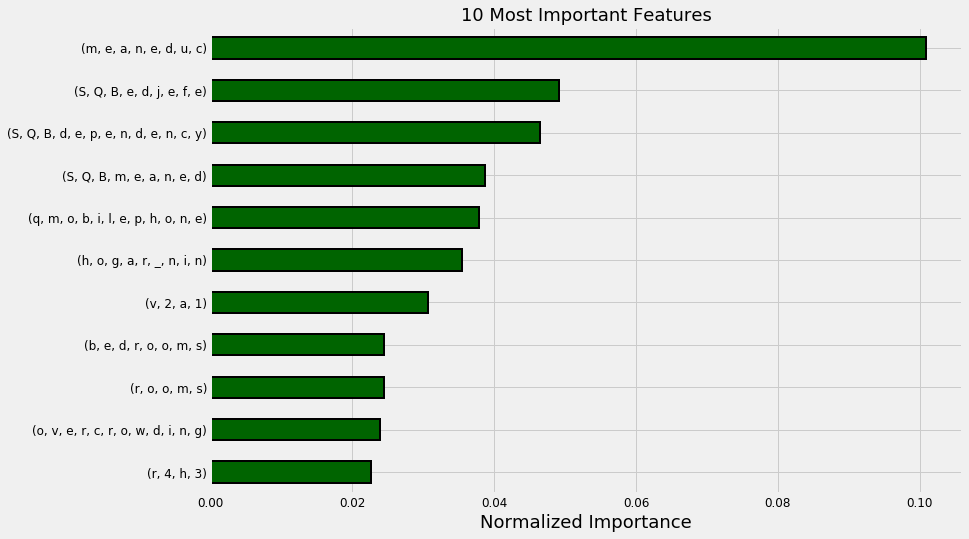

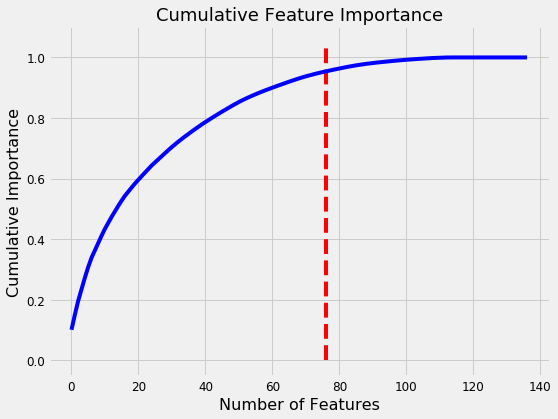

76 features required for 95% of cumulative importance.


In [22]:
#https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

In [95]:
df_train_2 = df_train_1.drop(['Target'], axis=1)
features = df_train_2.columns

In [96]:
#Let's make some predictions

sample_pred = classifier.predict(df_test[features])
sample_pred

array([4, 4, 4, ..., 2, 2, 2], dtype=int64)

In [97]:
df = pd.DataFrame(sample_pred)

In [98]:
df_test['Target'] = df

In [105]:
df_final = df_test[['Id', 'Target']]

In [108]:
df_final.to_csv("...\\path\\to\\submit_dt1.csv", index = False)